scene_id=690 scene_name=scene-0904 map_name=boston-seaport


/home/kfir/workspace/RadarLocalization/dataset.py:390: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  rot_imu = np.array([(m['utime'], m['q']) for m in self.imu])


odom_speed [[1.53729795e+15 9.00000000e+00]
 [1.53729795e+15 9.00000000e+00]
 [1.53729795e+15 9.00000000e+00]
 ...
 [1.53729837e+15 2.80000000e+01]
 [1.53729837e+15 2.90000000e+01]
 [1.53729837e+15 2.90000000e+01]]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


self.dir_name images/690/database


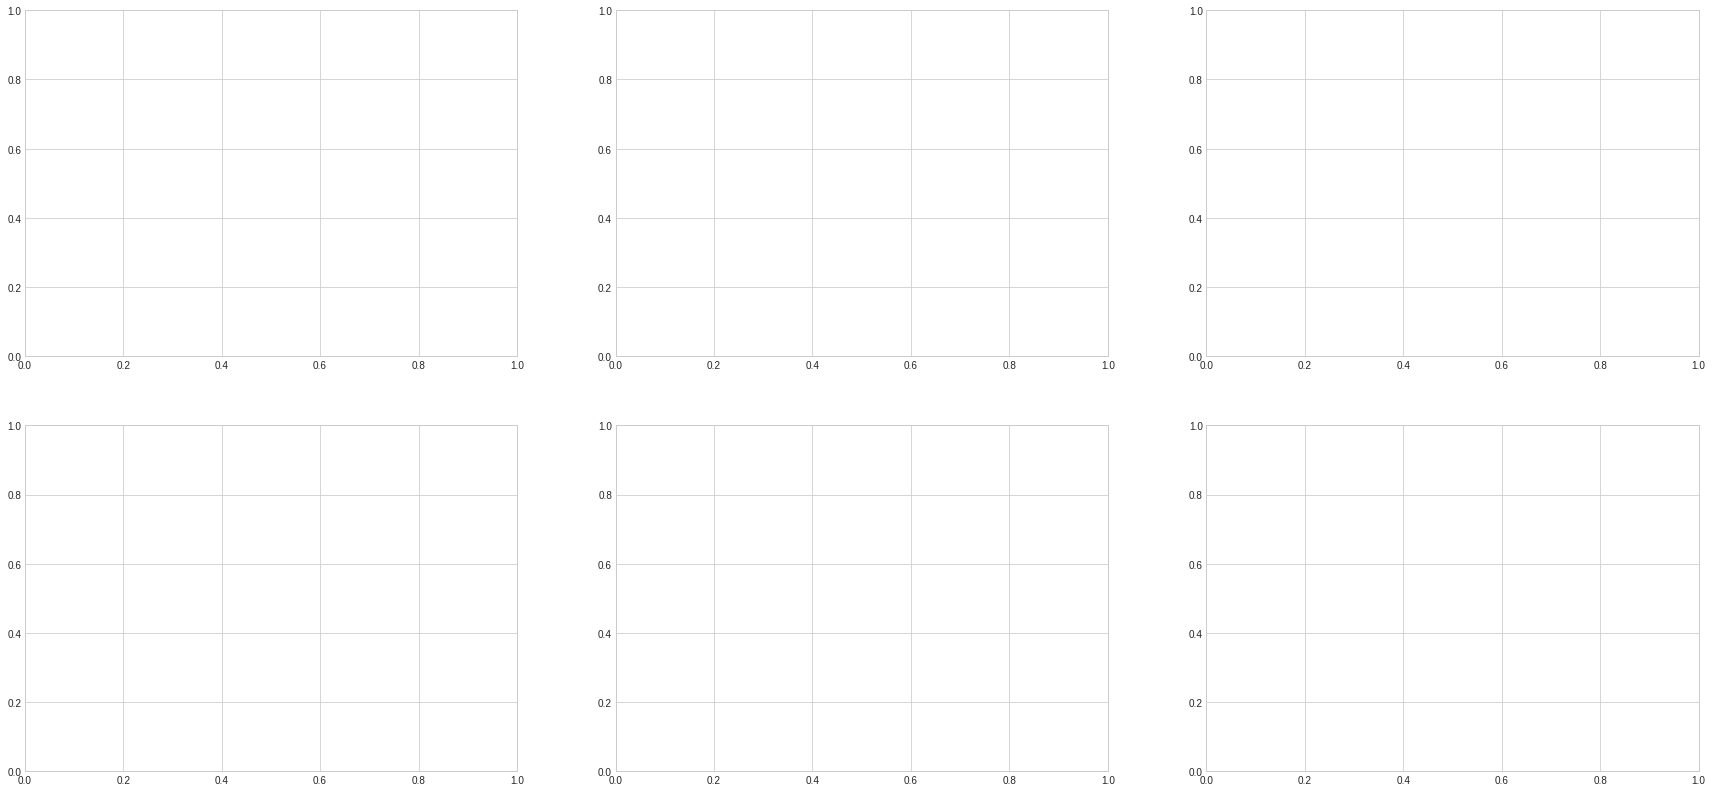

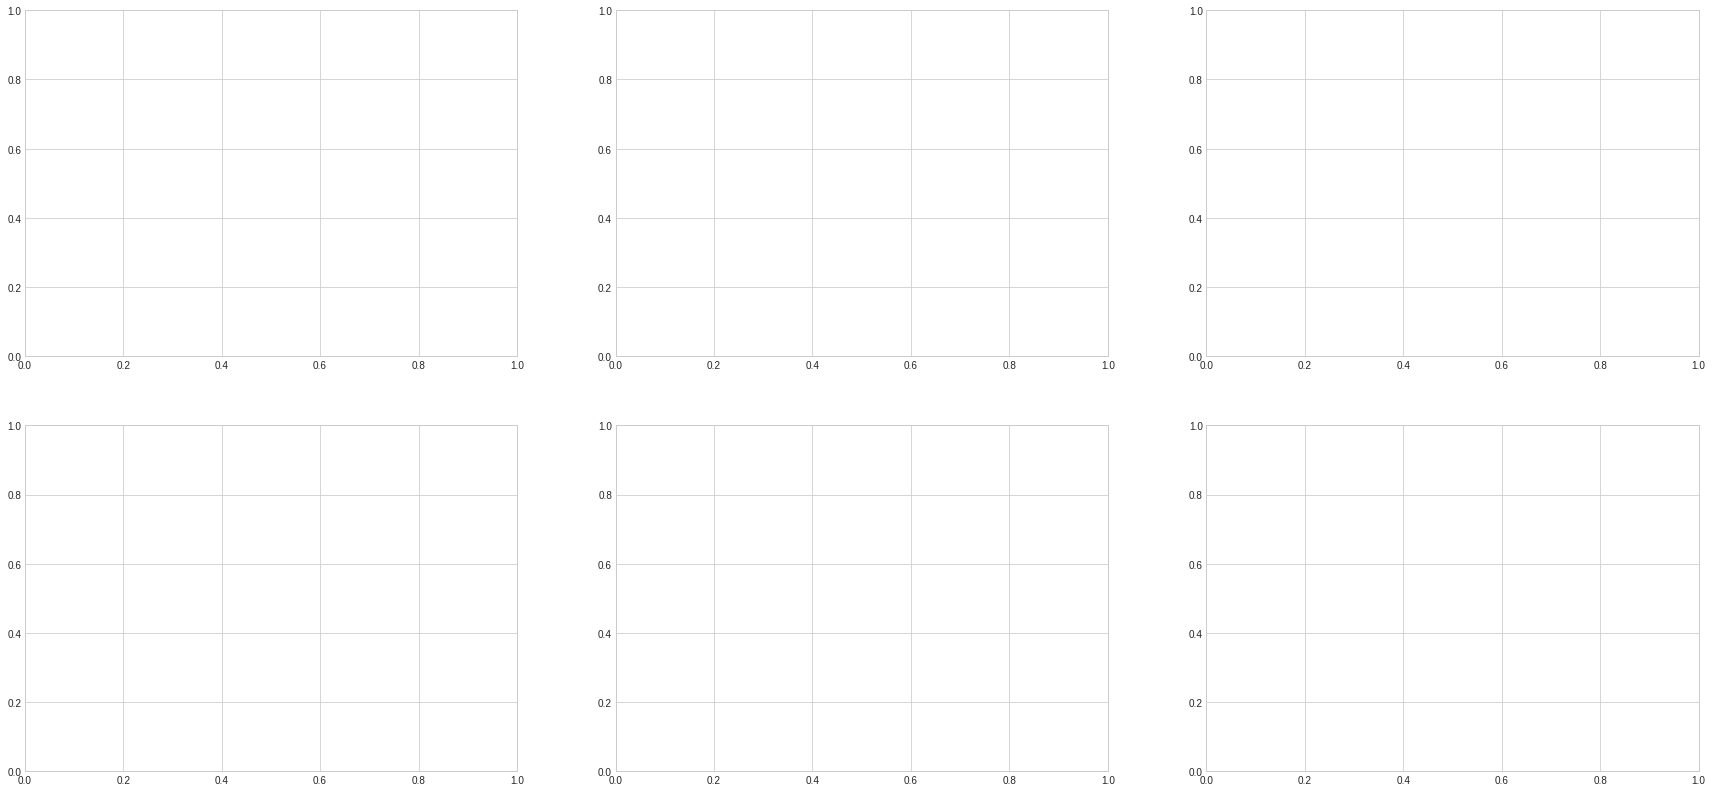

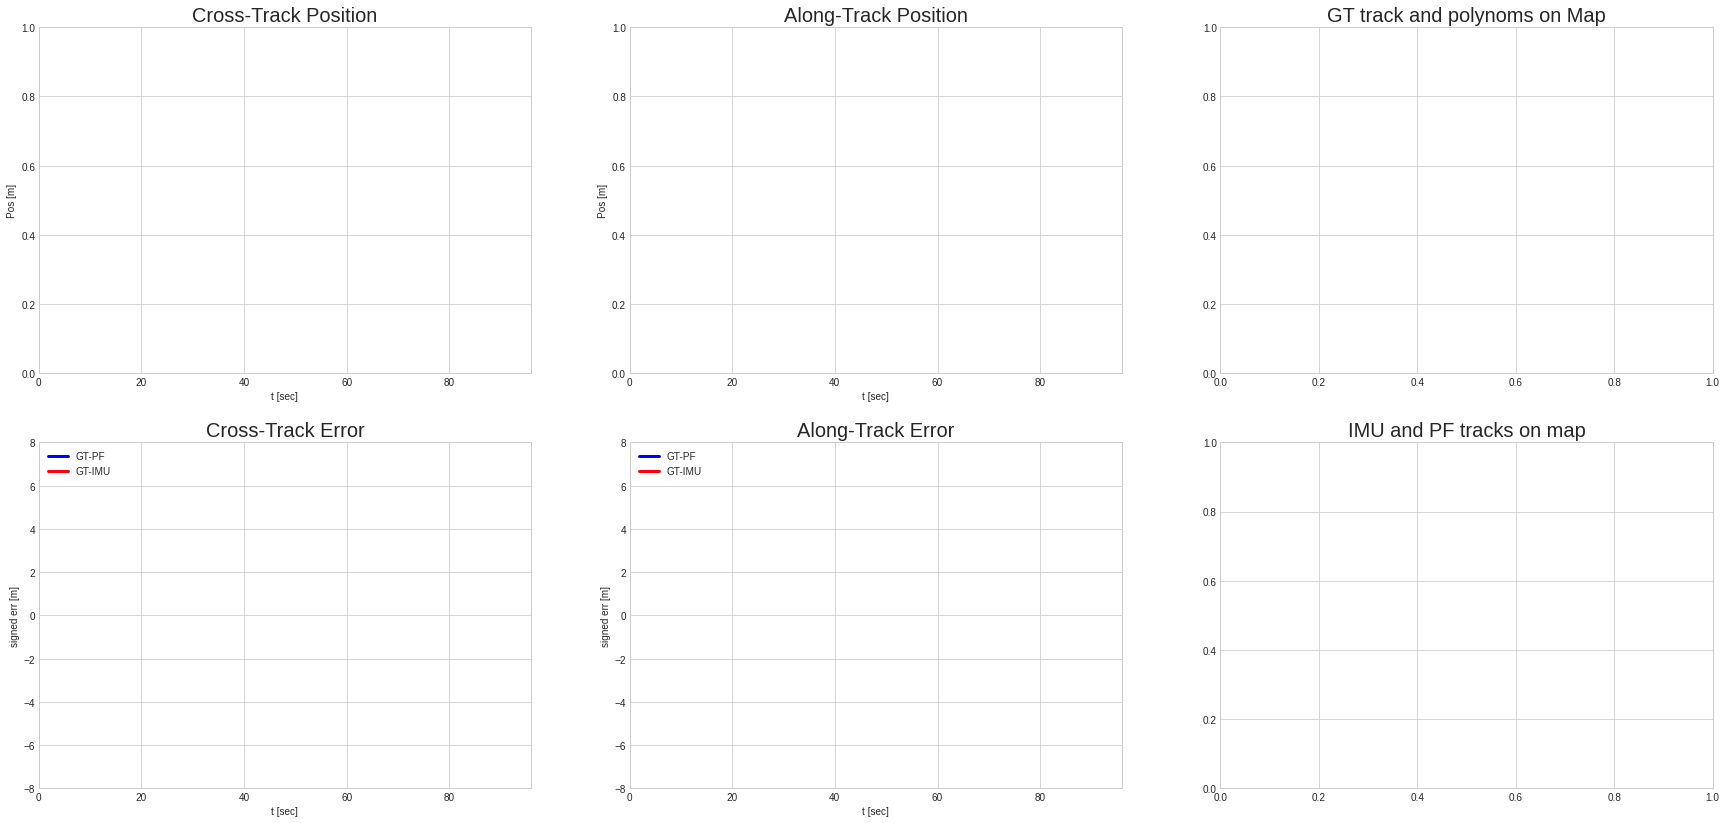

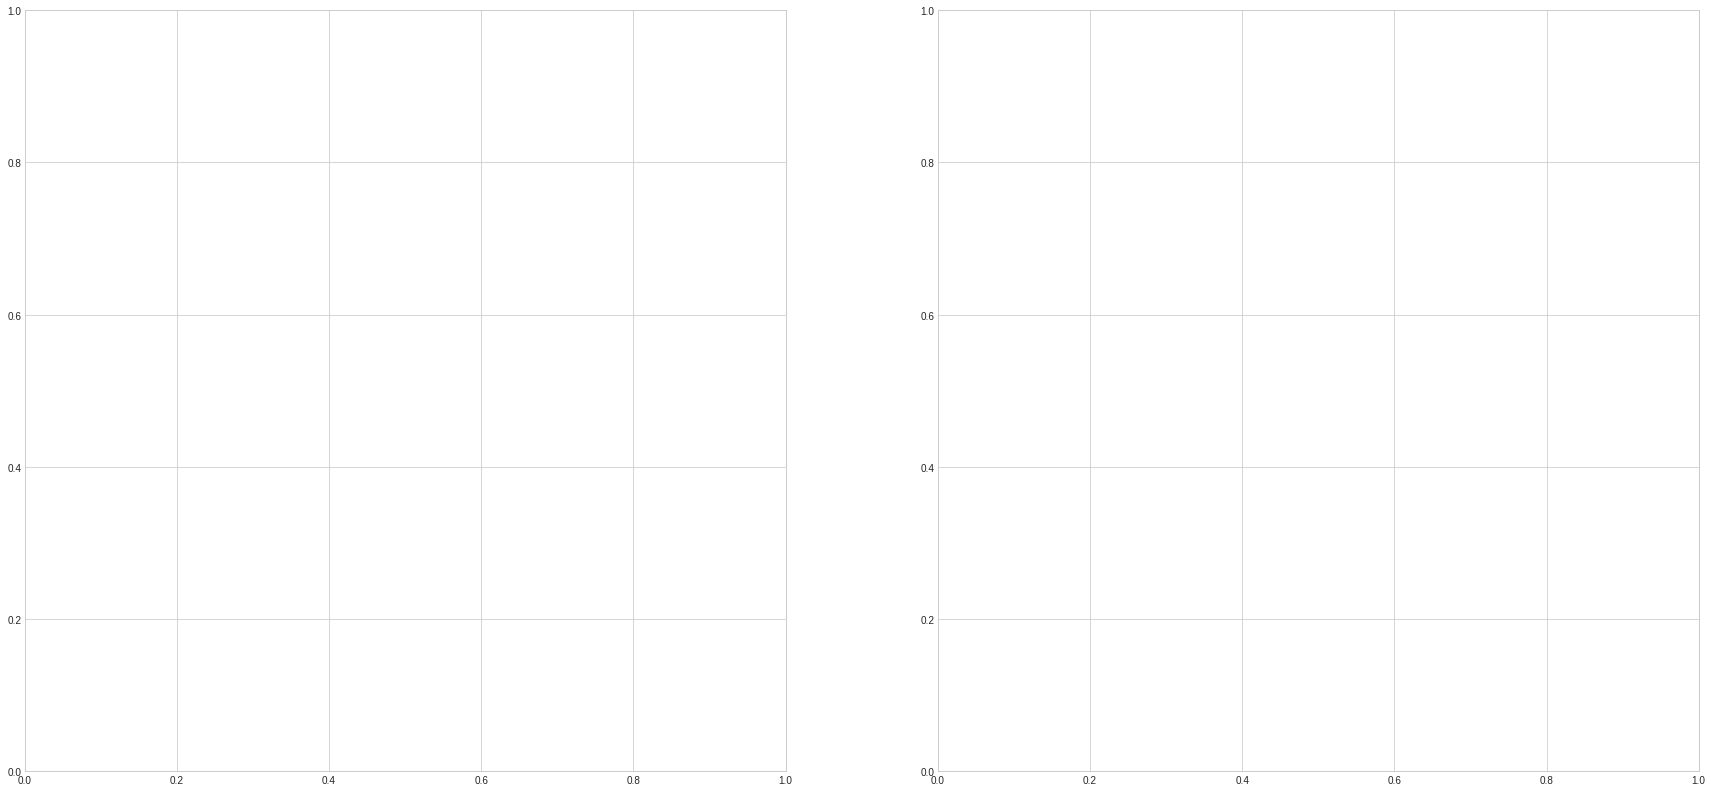

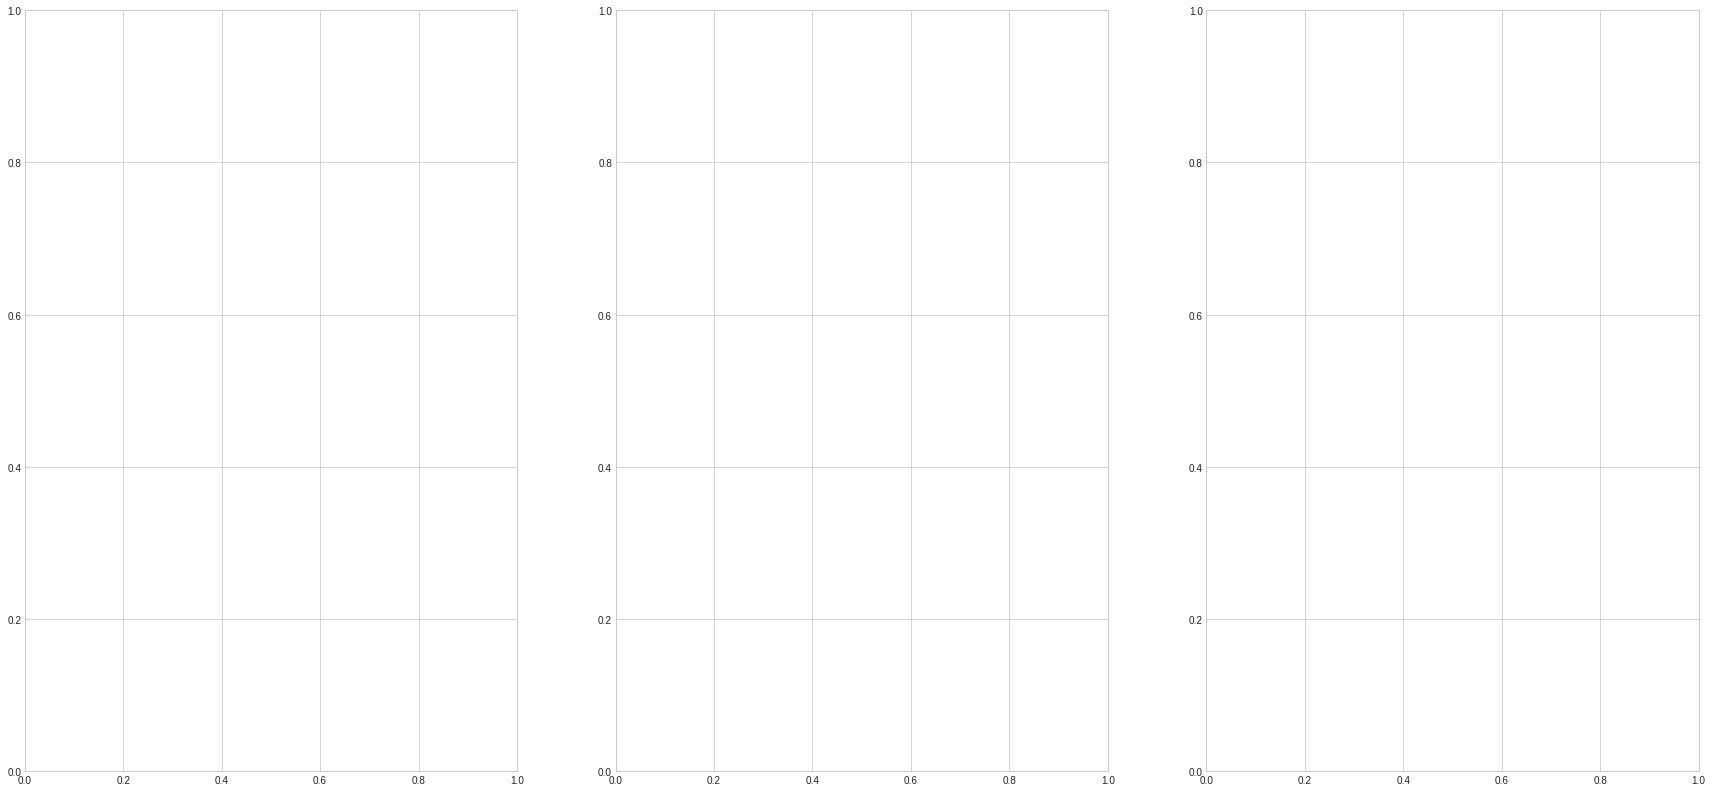

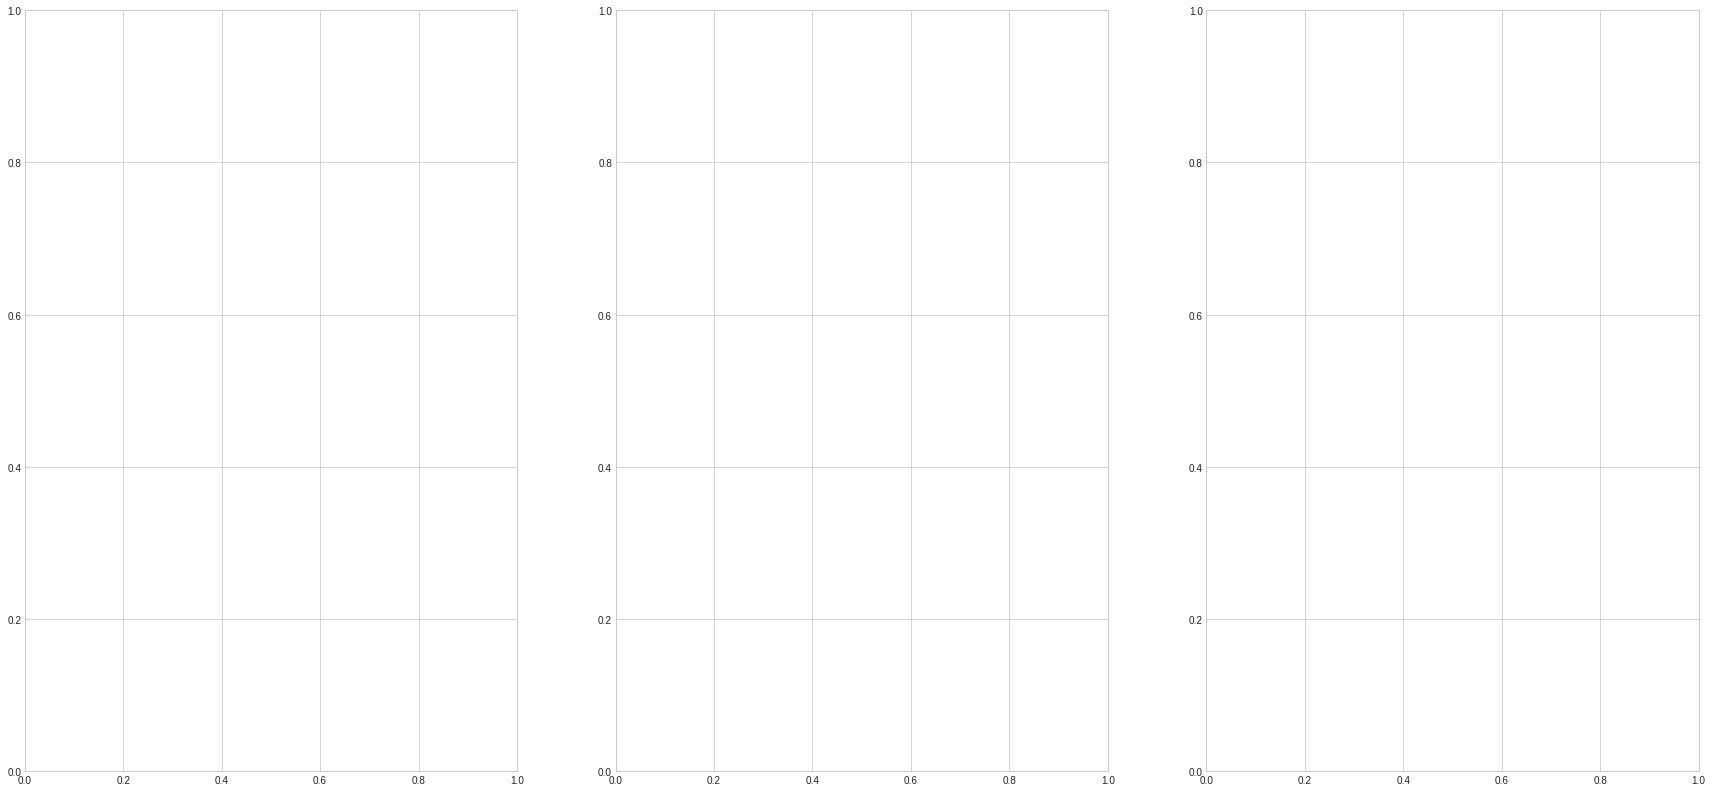

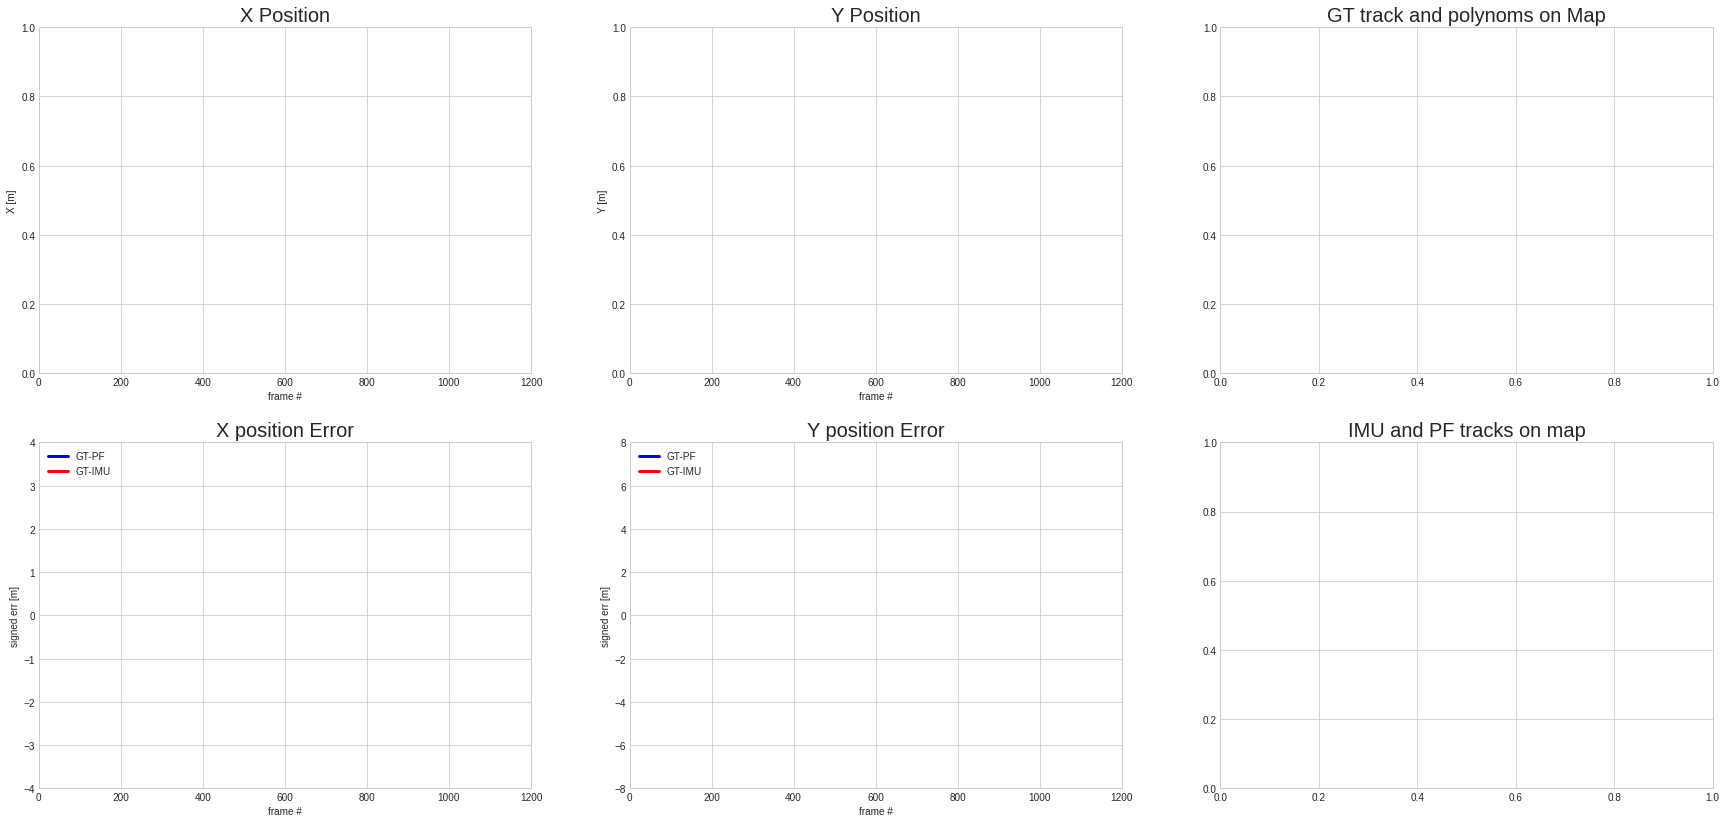

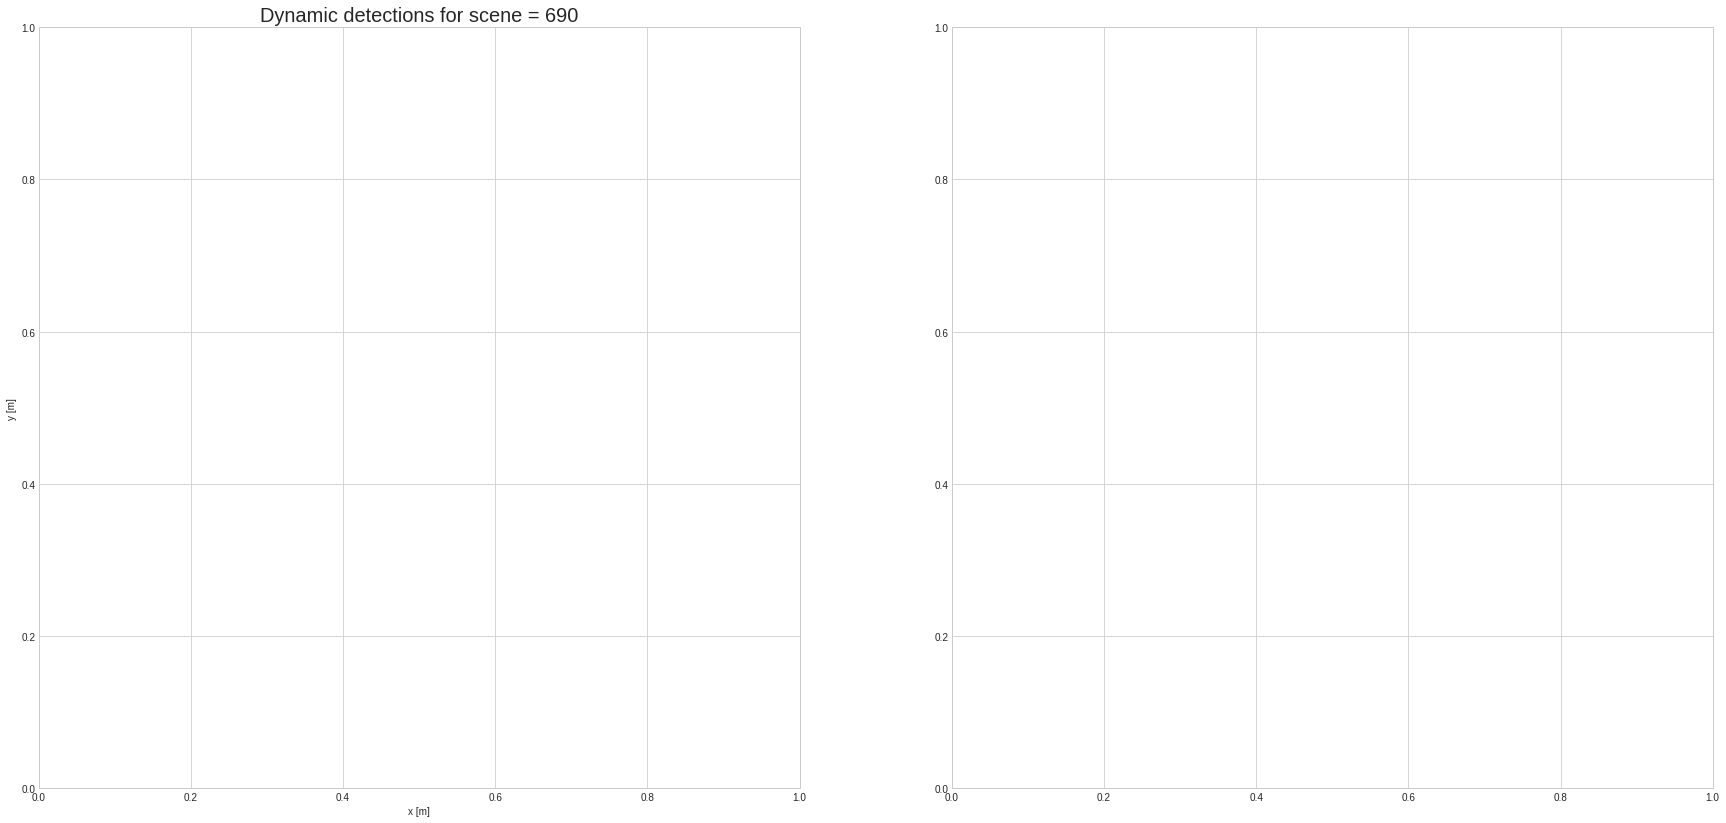

In [1]:
%load_ext autoreload
%autoreload 2

from nuscenes.nuscenes import NuScenes
directory = r"/home/kfir/workspace/nuScenes/v1.0-trainval"
nusc = NuScenes(version="v1.0-trainval", dataroot=directory, verbose=False)

from simulation import NuscenesSimulation

class DummyModel():
    def __init__(self):
        self.mm = True
        
scene = 690
dummy_model = DummyModel()
video_list={'video' : False, 'video_debug': False, 'video_pf': False, 'video_pf_xy': False, 'dynamic_tracker': False}
sim = NuscenesSimulation(nusc=nusc, model=dummy_model, scene_id=scene, Nmax=1200, video_list=video_list, save_processed=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/kfir/.local/lib/python3.6/site-packages/nuscenes/map_expansion/map_api.py:1823: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  exteriors = [int_coords(poly.exterior.coords) for poly in polygons]
/home/kfir/.local/lib/python3.6/site-packages/nuscenes/map_expansion/map_api.py:1824: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  interiors = [int_coords(pi.coords) for poly in polygons for pi in poly.interiors]


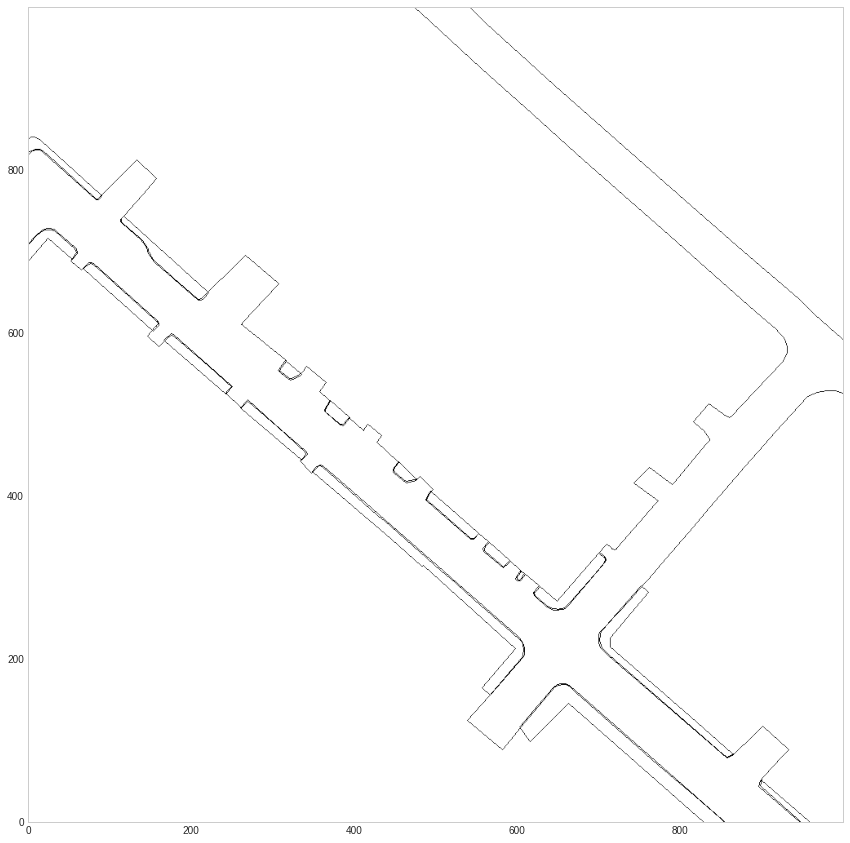

In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from map_utils import getRoadBorders, getCombinedMap, getLayer
nusc_map = sim.dataset.nusc_map

fig, ax = plt.subplots(1,1,figsize=(20,15),sharex=True,sharey=True)

first_pos = [600, 600]
patch_size = 200
edges = getCombinedMap(nuscMap=nusc_map, worldRef=first_pos, patchSize=patch_size, res_factor=5)
ax.imshow(edges, origin='lower')
ax.grid(False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


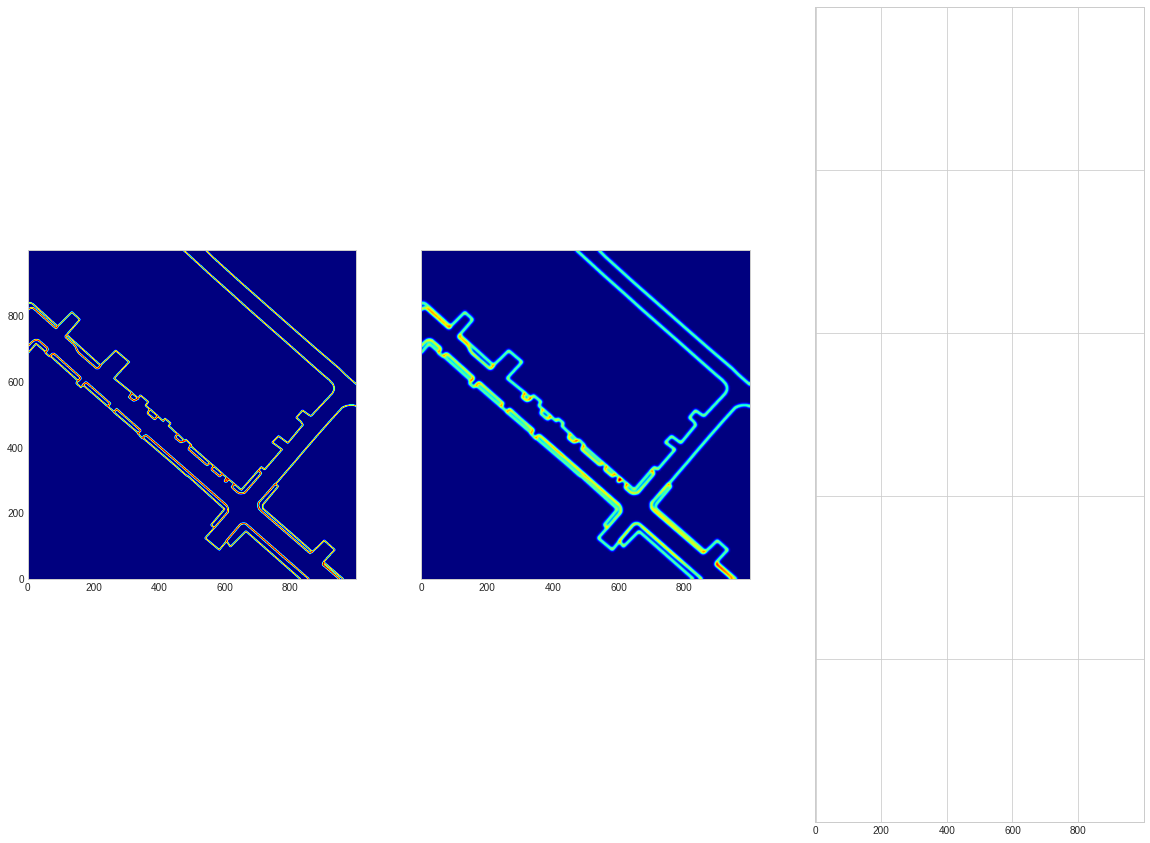

In [14]:
%load_ext autoreload
%autoreload 2

from map_utils import build_probability_map
# Call the function to build the probability map

probability_map1 = build_probability_map(edges, sigma=1.)
probability_map2 = build_probability_map(edges, sigma=4.)

fig, ax = plt.subplots(1,3,figsize=(20,15),sharex=True,sharey=True)
ax[0].imshow(probability_map1, origin='lower',cmap='jet')
ax[0].grid(False)
ax[1].imshow(probability_map2, origin='lower',cmap='jet')
ax[1].grid(False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


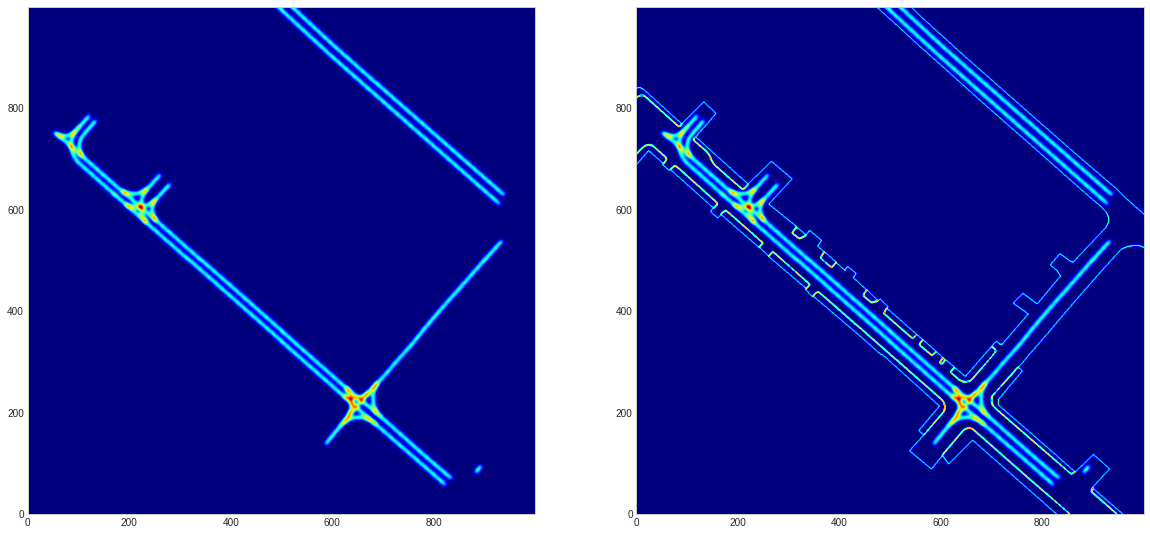

In [12]:
%load_ext autoreload
%autoreload 2

from map_utils import build_probability_map, scatter_to_image, drawLanes

fig, ax = plt.subplots(1,2,figsize=(20,15),sharex=False,sharey=False)

sparse_scatter = drawLanes(nusc_map, ego_trns=first_pos)
lanes = scatter_to_image(sparse_scatter, center=first_pos, res_factor=5, patch_size=patch_size)

lanes[lanes == 1] = 255
probability_ma_dynamic = build_probability_map(lanes, sigma=4.)

ax[0].imshow(probability_ma_dynamic,origin='lower',cmap='jet')
#ax[0].axis('equal')
ax[0].grid(False)

ax[1].imshow(probability_ma_dynamic + probability_map1,origin='lower',cmap='jet')
#ax[1].axis('equal')
ax[1].grid(False)